In [5]:
import pandas as pd
import textblob as tb
from google.colab import files
 
uploaded = files.upload()



Saving data.csv to data.csv


In [6]:
df = pd.read_csv (r'/content/data.csv',sep=";",quoting=3, on_bad_lines='skip')
print(len(df.index))
print(f"->{df.isin(['NaN', 'None', 'none']).sum()}")
print(df.info())
print(df.head(20))

7331
->text      0
source    0
label     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7331 entries, 0 to 7330
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7331 non-null   object
 1   source  7331 non-null   object
 2   label   7331 non-null   object
dtypes: object(3)
memory usage: 171.9+ KB
None
                                                 text     source  label
0   The CDC currently reports 99031 deaths. In gen...   twitter   real 
1    States reported 1121 deaths a small rise from...   twitter   real 
2    Politically Correct Woman (Almost) Uses Pande...  twitter    fake 
3     #IndiaFightsCorona: We have 1524 #COVID test...   twitter   real 
4    Populous states can generate large case count...   twitter   real 
5    "Covid Act Now found ""on average each person...   twitter   real 
6    If you tested positive for #COVID19 and have ...   twitter   real 
7    Obama Calls Trumps Coronavirus

In [7]:
import numpy as np 
import pandas as pd 


import spacy 

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


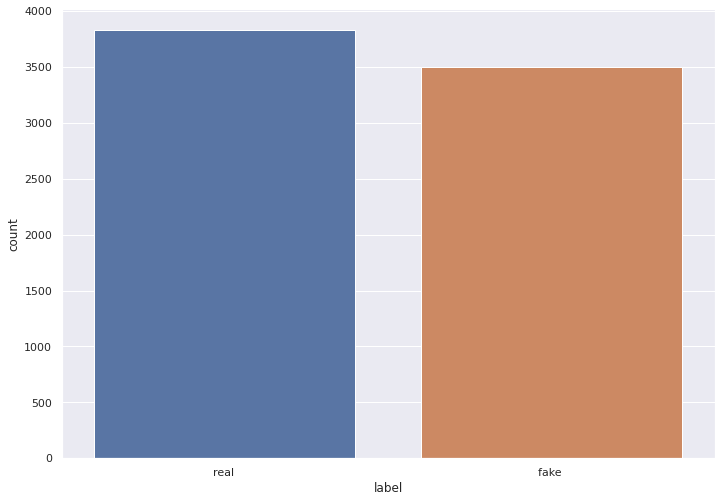

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df['label'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    7331.000000
mean       77.785023
std       234.527406
min         2.000000
25%        18.000000
50%        30.000000
75%        43.000000
max      4180.000000
Name: length, dtype: float64

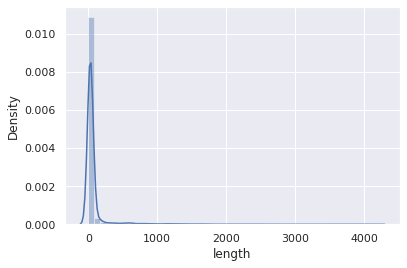

In [ ]:
df['length'] = df['text'].apply(lambda x: len(x.split(' '))) 
sns.distplot(df['length'])
df['length'].describe()

In [8]:
#rimuovo la punteggiatura tranne ! ?
print(df.head(20))
df = df.apply(lambda x: x.str.replace(',', ''))
df = df.apply(lambda x: x.str.replace(':', ''))
df = df.apply(lambda x: x.str.replace(';', ''))
df = df.apply(lambda x: x.str.replace('.', ''))
df = df.apply(lambda x: x.str.replace('"', ''))
df = df.apply(lambda x: x.str.replace('#', ''))
df.replace('\'','', regex=True, inplace=True) 
df = df.apply(lambda x: x.str.replace('(', ''))
df = df.apply(lambda x: x.str.replace(')', ''))
print(df.head(20))

                                                 text     source  label
0   The CDC currently reports 99031 deaths. In gen...   twitter   real 
1    States reported 1121 deaths a small rise from...   twitter   real 
2    Politically Correct Woman (Almost) Uses Pande...  twitter    fake 
3     #IndiaFightsCorona: We have 1524 #COVID test...   twitter   real 
4    Populous states can generate large case count...   twitter   real 
5    "Covid Act Now found ""on average each person...   twitter   real 
6    If you tested positive for #COVID19 and have ...   twitter   real 
7    Obama Calls Trumps Coronavirus Response A Cha...  twitter    fake 
8     ???Clearly, the Obama administration did not...  twitter    fake 
9     RetractionHydroxychloroquine or chloroquine ...   twitter   fake 
10   Take simple daily precautions to help prevent...   twitter   real 
11   The NBA is poised to restart this month. In M...   twitter   fake 
12   We just announced that the first participants...   twitter 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()


In [9]:
print(df.duplicated()) #verifico se ci sono duplicati
df.dropna(inplace = True) #rimuovo le righe con valore NULL
df.drop_duplicates(inplace = True)#elimino duplicati
print(df.info())
print(df.head())


0       False
1       False
2       False
3       False
4       False
        ...  
7326    False
7327    False
7328    False
7329    False
7330    False
Length: 7331, dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7267 entries, 0 to 7330
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7267 non-null   object
 1   source  7267 non-null   object
 2   label   7267 non-null   object
dtypes: object(3)
memory usage: 227.1+ KB
None
                                                text     source  label
0  The CDC currently reports 99031 deaths In gene...   twitter   real 
1   States reported 1121 deaths a small rise from...   twitter   real 
2   Politically Correct Woman Almost Uses Pandemi...  twitter    fake 
3    IndiaFightsCorona We have 1524 COVID testing...   twitter   real 
4   Populous states can generate large case count...   twitter   real 


In [10]:
from textblob import TextBlob
from textblob.en.inflect import singularize
from textblob import Word

df['text'] = df['text'].astype('str')
print(df.head(20))
#rendo singolari le parole
df['text'] = df['text'].apply(lambda x: ' '.join([singularize(item) for item in x.split()]))
print(df.head(20))
#df['text'] = df['text'].apply(lambda x: ' '.join([lemmatize(item) for item in x.split()]))
#print(df.head(20))


                                                 text     source  label
0   The CDC currently reports 99031 deaths In gene...   twitter   real 
1    States reported 1121 deaths a small rise from...   twitter   real 
2    Politically Correct Woman Almost Uses Pandemi...  twitter    fake 
3     IndiaFightsCorona We have 1524 COVID testing...   twitter   real 
4    Populous states can generate large case count...   twitter   real 
5    Covid Act Now found on average each person in...   twitter   real 
6    If you tested positive for COVID19 and have n...   twitter   real 
7    Obama Calls Trumps Coronavirus Response A Cha...  twitter    fake 
8     ???Clearly the Obama administration did not ...  twitter    fake 
9     RetractionHydroxychloroquine or chloroquine ...   twitter   fake 
10   Take simple daily precautions to help prevent...   twitter   real 
11   The NBA is poised to restart this month In Ma...   twitter   fake 
12   We just announced that the first participants...   twitter 

In [11]:
#La lemmatizzazione di textBlob richiede di indicare se deve lemmatizzare un verbo oun sostantivo. dato che non ho previsto una fase di POS, ho deciso di lemmatizzare soltanto i verbi in quanto sembrano essere quelli che hanno più necessità e che racchiudono il significato maggiore.
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from textblob import Word
print(df.head(20))
df['text'] = df['text'].astype('str')
df['text'] = df['text'].apply(lambda x: ' '.join([Word(item).lemmatize("v") for item in x.split()]))
print(df.head(20))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                                 text     source  label
0   The CDC currently report 99031 death In genera...   twitter   real 
1   State reported 1121 death a small rise from la...   twitter   real 
2   Politically Correct Woman Almost Use Pandemic ...  twitter    fake 
3   IndiaFightsCorona We have 1524 COVID testing l...   twitter   real 
4   Populou state can generate large case count bu...   twitter   real 
5   Covid Act Now found on average each person in ...   twitter   real 
6   If you tested positive for COVID19 and have no...   twitter   real 
7   Obama Call Trump Coronaviru Response A Chaotic...  twitter    fake 
8   ???Clearly the Obama administration did not le...  twitter    fake 
9   RetractionHydroxychloroquine or chloroquine wi...   twitter   fake 
10  Take simple daily precaution to help prevent t...   twitter   real 
11  The NBA is poised to restart thi month In Marc...   twitter   fake 
12  We just announced that the first participant i...   twitter 

In [12]:
print(df.head(20))
stopWords = {"the": "",
            "The": "",
            "A": "",
            "a": "",
            "an": "",
            "An": "",
            "I": "",
            "You": "",
            "you": "",
            "It": "",
            "it": "",
            "he": "",
            "He": "",
            "She": "",
            "she": "",
            "we": "",
            "We": "",
            "They": "",
            "they": "",
            "me": "",
            "Me": "",
            "him": "",
            "Him": "",
            "her": "",
            "Her": "",
            "us": "",
            "Us": "",
            "them": "",
            "Them": "",
            "By": "",
            "by": "",
            "within": "",
            "Within": "",
            "From": "",
            "from": "",
            "To": "",
            "to": "",
            "After": "",
            "after": "",
            "util": "",
            "Until": "",
            "Til": "",
            "til": "",
            "before": "",	
            "Before": "",
            "since": "",
            "Since": "",
            "for": "",
            "For": "",	
            "During": "",
            "at": "",
            "At": "",
            "In": "",
            "in": "",
            "On": "",
            "on": "",
            "Over": "",
            "over": "",
            "Above": "",
            "above": "",
            "Under": "",
            "under": "",
            "Around": "",
            "around": "",
            "Near": "",
            "near": "",
            "Behind": "",
            "behind": "",
            "Across": "",
            "across": "",
            "between": "",
            "Between": "",
            "of": "",
            "Of": "",
            "Among": "",
            "among": "",
            "Into": "",
            "into": "",
            "by": "",
            "By": "",
            "As": "",
            "as": "",
            "And": "",
            "and": "",
            "End": "",
            "end": ""}
print(stopWords.get("As"))
df['text'] = df['text'].astype('str')
column_names = ["text", "source", "lable"]
df1 = pd.DataFrame(columns = column_names)
c=0
for x in df['text']:
  var=x.split(" ")
  i=0
  for v in var:
    if (stopWords.get(v) == ""):
      var[i] = stopWords.get(v)
    i+=1
  if c == 1:
    print(var) 
  #df1.append(pd.Series([' '.join(var),df['source'].iloc[c],df['label'].iloc[c]]),ignore_index=True)
  #df['text'].loc[c] == ' '.join(var)
  df.iloc[c] = pd.Series([' '.join(var),df['source'].iloc[c],df['label'].iloc[c]])  
    
  c+=1
      #var.replace(v,stopWords.get(v))
#df['text'] = df['text'].astype('str')
#df['text'] = df['text'].apply(lambda x: ' '.join([x.replace(stopWords, inplace=True) for item in x.split()]))
#df['text'].replace(stopWords, inplace=True)
#print(df['source'].iloc[c-1].value)
#print(df['source'].iloc[c-1])
print(var)
print(df.head())

                                                 text     source  label
0   The CDC currently report 99031 death In genera...   twitter   real 
1   State report 1121 death a small rise from last...   twitter   real 
2   Politically Correct Woman Almost Use Pandemic ...  twitter    fake 
3   IndiaFightsCorona We have 1524 COVID test labo...   twitter   real 
4   Populou state can generate large case count bu...   twitter   real 
5   Covid Act Now find on average each person in I...   twitter   real 
6   If you test positive for COVID19 and have no s...   twitter   real 
7   Obama Call Trump Coronaviru Response A Chaotic...  twitter    fake 
8   ???Clearly the Obama administration do not lea...  twitter    fake 
9   RetractionHydroxychloroquine or chloroquine wi...   twitter   fake 
10  Take simple daily precaution to help prevent t...   twitter   real 
11  The NBA be poise to restart thi month In March...   twitter   fake 
12  We just announce that the first participant in...   twitter 

In [13]:
print(df.head())
real_news = df[df['label'] == "fake "]

print(real_news)

                                                text     source  label
0   CDC currently report 99031 death  general  di...   twitter   real 
1  State report 1121 death  small rise  last Tues...   twitter   real 
2  Politically Correct Woman Almost Use Pandemic ...  twitter    fake 
3  IndiaFightsCorona  have 1524 COVID test labora...   twitter   real 
4  Populou state can generate large case count bu...   twitter   real 
                                                   text              source  \
2     Politically Correct Woman Almost Use Pandemic ...           twitter     
7     Obama Call Trump Coronaviru Response  Chaotic ...           twitter     
8     ???Clearly  Obama administration do not leave ...           twitter     
9     RetractionHydroxychloroquine or chloroquine wi...            twitter    
11     NBA be poise  restart thi month  March  repor...            twitter    
...                                                 ...                 ...   
7269   world coronavi

In [14]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
#Modellazione di argomenti con allocazione Dirichlet latente
#Dopo aver preelaborato i dati del testo, sono stato in grado di utilizzare l'allocazione Dirichlet latente (LDA) per confrontare gli argomenti e i termini più significativi in ​​articoli di notizie reali e false
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
import pyLDAvis.sklearn

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [16]:
#esegue la modellazione degli argomenti sugli articoli di notizie reali preelaborati con dieci argomenti diversi
# e quindi crea una visualizzazione interattiva che mostra ogni argomento in uno spazio bidimensionale utilizzando pyLDAvis.

real_news = df[df['label'] == "real "]

num_topics = 10
num_features=5000

vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
lda = LatentDirichletAllocation(n_components=num_topics,
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=0)

lda_pipeline = Pipeline([('vectorizer', vectorizer), ('lda', lda)])
lda_pipeline.fit(real_news['text'])
pyLDAvis.enable_notebook()
data_vectorized = vectorizer.fit_transform(df['text'])
dash = pyLDAvis.sklearn.prepare(lda_pipeline.steps[1][1], data_vectorized, vectorizer, mds='tsne')
pyLDAvis.save_html(dash, 'real_news_lda.html')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

In [17]:
fake_news = df[df['label'] == "fake "]

num_topics = 10
num_features=5000

vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
lda = LatentDirichletAllocation(n_components=num_topics,
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=0)

lda_pipeline = Pipeline([('vectorizer', vectorizer), ('lda', lda)])
lda_pipeline.fit(fake_news['text'])

pyLDAvis.enable_notebook()
data_vectorized = vectorizer.fit_transform(df['text'])
dash = pyLDAvis.sklearn.prepare(lda_pipeline.steps[1][1], data_vectorized, vectorizer, mds='tsne')
pyLDAvis.save_html(dash, 'fake_news_lda.html')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

In [22]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
from keras.models import Sequential, load_model
from keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint

class LSTM_Text_Classifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, embedding_vector_length, max_seq_length, lstm_layers, batch_size=32, num_epochs=3, use_hash=False,
                dropout=None, conv_params=None):
        
        """
         Metodo __init__: crea il tokenizer per il modello e salva tutti i parametri
         embedding_vector_length - la lunghezza dei vettori di parole che verranno appresi dal livello di incorporamento
         max_seq_length - la sequenza di parole più lunga che verrà presa in considerazione dal classificatore (es. 500 parole)
         lstm_layers - un elenco con il numero di LSTM in ogni livello ricorrente
         batch_size - la dimensione del batch utilizzata per addestrare il modello
         num_epochs - il numero massimo di epoche per cui allenarsi
         use_hash - se usare o meno il trucco dell'hashing per l'indicizzazione delle parole
         dropout: il tasso di dropout utilizzato nei livelli di dropout del modello
         conv_params - un dizionario con parametri per la parte convoluzionale del modello
        """
        
        self.embedding_vector_length = embedding_vector_length
        self.max_seq_length = max_seq_length
        self.lstm_layer_sizes = lstm_layers
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.use_hashing_trick = use_hash
        if not self.use_hashing_trick:
            self.tokenizer = Tokenizer()
        self.dropout = dropout
        self.conv_params = conv_params
        
    
    def _get_word_index(self, word):
        """
        Questa funzione recupera l'indice per una determinata parola utilizzando il tokenizer.
        """
        
        try:
            return self.tokenizer.word_index[word]
        except:
            return None
        
    def _text_to_int_sequence(self, text):
        "Questa funzione converte una stringa di testo in una sequenza intera"
        
        seq = [self._get_word_index(word) for word in text_to_word_sequence(text)]
        return [index for index in seq if index]
        
    def fit(self, X, y, validation_data):
        
        all_X = pd.concat([X, validation_data[0]])
        if self.use_hashing_trick:
            all_words = set()
            for text in all_X:
                new_words = set(text_to_word_sequence(text))
                all_words = all_words.union(new_words)
            self.max_vocab = len(all_words)*1.3
            
            for i in range(len(X)):
                X[i] = hashing_trick(X[i], self.max_vocab, hash_function='md5')
            X_pad = sequence.pad_sequences(X, maxlen=self.max_seq_length)
            
            X_valid = validation_data[0]
            
            for i in range(len(X_valid)):
                X_valid[i] = hashing_trick(X_valid[i],self.max_vocab, hash_function='md5')
            X_valid_pad = sequence.pad_sequences(X_valid, maxlen=self.max_seq_length)
        
            y_valid = validation_data[1]
            
        else:    
            print('Fitting Tokenizer...')
            self.tokenizer.fit_on_texts(all_X)
            self.max_vocab = len(self.tokenizer.word_index) + 20
            X = X.apply(self._text_to_int_sequence)
            X_pad = sequence.pad_sequences(X, maxlen=self.max_seq_length)
        
            X_valid = validation_data[0].apply(self._text_to_int_sequence)
            X_valid_pad = sequence.pad_sequences(X_valid, maxlen=self.max_seq_length)
        
            y_valid = validation_data[1]
        
        self.model = Sequential()
        self.model.add(Embedding(self.max_vocab, self.embedding_vector_length, input_length=self.max_seq_length))
            
        if self.conv_params is not None:
            use_pooling = False
            if self.conv_params['pool_size'] is not None:
                use_pooling = True
            
            for i in range(self.conv_params['n_layers']):
                self.model.add(Conv1D(filters=2*(i+1)*self.conv_params['filters'], 
                                      kernel_size=self.conv_params['kernel_size'], 
                                      padding='same', activation='relu'))
                if use_pooling:
                    self.model.add(MaxPooling1D(pool_size=self.conv_params['pool_size']))

            
        if len(self.lstm_layer_sizes) > 1:
            for lstm_layer_size in self.lstm_layer_sizes[:-1]:
                self.model.add(LSTM(lstm_layer_size, return_sequences=True))
                self.model.add(Dropout(self.dropout))
            self.model.add(LSTM(self.lstm_layer_sizes[-1]))
        else:
            self.model.add(LSTM(self.lstm_layer_sizes[0]))
        if self.dropout is not None:
            self.model.add(Dropout(self.dropout))
        #Uno strato denso è lo strato più utilizzato, che è fondamentalmente uno strato in cui ogni neurone riceve input da tutti i neuroni nello strato precedente, quindi "densamente connesso".
        #I livelli densi migliorano la precisione complessiva e 5-10 unità o nodi per livello sono una buona base. Quindi la forma di output dello strato denso finale sarà influenzata dal numero di neuroni/unità specificati.
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=1,
                              verbose=2, mode='max')
        
        checkpoint = ModelCheckpoint(filepath='best_model',
                                     monitor='val_accuracy',
                                     mode='max',
                                     save_best_only=True)
        
        callbacks_list = [early_stopping, checkpoint]
        print(self.model.summary())
        
        print('Fitting model...')
        self.model.fit(X_pad, y, validation_data=(X_valid_pad, y_valid), 
                  epochs=self.num_epochs, batch_size=self.batch_size)
        
        
    def predict(self, X):
        """
         Questa funzione è analoga alla funzione di previsione Scikit-learn utilizzata per la sua API di stima. Prima preelabora il testo
         data e lo converte in una sequenza intera.
         X (simile a una matrice) - inserisci dati di testo
        """
        if type(X) == pd.core.frame.DataFrame or type(X) == pd.core.series.Series:
            X = X.apply(self._text_to_int_sequence)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return self.model.predict(X)
        elif type(X) == str:
            X = self._text_to_int_sequence(X)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return self.model.predict(X)
        else:
            X = map(X, self._text_to_int_sequence)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return self.model.predict(X)
        
    def predict_classes(self, X):
        
        if type(X) == pd.core.frame.DataFrame or type(X) == pd.core.series.Series:
            X = X.apply(self._text_to_int_sequence)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return self.model.predict_classes(X)
        elif type(X) == str:
            X = self._text_to_int_sequence(X)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return self.model.predict_classes(np.array(X))
        else:
            X = map(X, self._text_to_int_sequence)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return self.model.predict_classes(np.array(X))
    
    def predict_proba(self, X):
          
        if type(X) == pd.core.series.Series:
            X = X.apply(self._text_to_int_sequence)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return self.model.predict_proba(X)
        elif type(X) == str:
            X = self._text_to_int_sequence(X)
            X = sequence.pad_sequence(X, maxlen = self.max_seq_length)
            return self.model.predict_proba(np.array(X))
        else:
            X = map(X, self._text_to_word_sequence)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return self.model.predict_proba(np.array(X))
    
    def load_model(self, file_path):
        "Questa funzione è un wrapper della funzione load_model Keras"
        
        self.model = load_model(file_path)
    
    def score(self, X, y):
        "Questa funzione è un wrapper della funzione punteggio Scikit-learn per la sua API di stima."
        
        pred = self.predict(X)
        return accuracy_score(y, pred)

In [19]:
df["label"].loc[df["label"]=="real "]=1.0
df["label"].loc[df["label"]=="fake "]=0.0
print(df.head())

                                                text     source label
0   CDC currently report 99031 death  general  di...   twitter    1.0
1  State report 1121 death  small rise  last Tues...   twitter    1.0
2  Politically Correct Woman Almost Use Pandemic ...  twitter     0.0
3  IndiaFightsCorona  have 1524 COVID test labora...   twitter    1.0
4  Populou state can generate large case count bu...   twitter    1.0


In [23]:
lstm_classifier = LSTM_Text_Classifier(embedding_vector_length=64, max_seq_length=512, dropout=0.2, lstm_layers=[128, 128], batch_size=32, num_epochs=10, use_hash=False,
conv_params={'filters': 128, 
             'kernel_size': 6, 
             'pool_size': 2,
             'n_layers': 3})

from sklearn.model_selection import train_test_split
y = df["label"].values
y = np.asarray(y).astype("float64")
#X = np.asarray(X).astype(np.int_)
#Y = np.array(Y).astype(np.int_)
X_train, X_test, y_train, y_test = train_test_split(df.text, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

lstm_classifier.fit(X_train, y_train, validation_data=(X_valid, y_valid))





Fitting Tokenizer...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 512, 64)           1547968   
                                                                 
 conv1d_3 (Conv1D)           (None, 512, 256)          98560     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 256, 256)         0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 256, 512)          786944    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 128, 512)         0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (Non

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

lstm_classifier.load_model('best_model')
print(type(lstm_classifier))

y_pred = (lstm_classifier.predict(X_valid) > 0.5).astype("int32")
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred, digits=4))

<class '__main__.LSTM_Text_Classifier'>
[[505  55]
 [ 48 555]]
              precision    recall  f1-score   support

         0.0     0.9132    0.9018    0.9075       560
         1.0     0.9098    0.9204    0.9151       603

    accuracy                         0.9114      1163
   macro avg     0.9115    0.9111    0.9113      1163
weighted avg     0.9115    0.9114    0.9114      1163



In [25]:
def print_metrics(confusion_matrix):
    print(confusion_matrix)
    tp = confusion_matrix[1][1]
    fp = confusion_matrix[0][1]
    fn = confusion_matrix[1][0]
    tn = confusion_matrix[0][0]
    print("True positive: ", tp)
    print("False positive: ", fp)
    print("False negative: ", fn)
    print("True negative: ", tn)
    print("Precision: ", tp / (tp + fp))
    print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
    print("Recall: ", tp / (tp + fn))
    print("False negative rate: ", fn / (tp + fn))
    print("False positive rate: ", fp / (fp + tn))

print_metrics(confusion_matrix(y_valid, y_pred))

[[505  55]
 [ 48 555]]
True positive:  555
False positive:  55
False negative:  48
True negative:  505
Precision:  0.9098360655737705
Accuracy:  0.9114359415305245
Recall:  0.9203980099502488
False negative rate:  0.07960199004975124
False positive rate:  0.09821428571428571


In [26]:
#Mentre i risultati della convalida possono darci qualche indicazione delle prestazioni del modello su dati invisibili, è il set di test, che non è stato affatto toccato durante il processo di addestramento del modello, che fornisce la migliore misura oggettiva e statisticamente corretta delle prestazioni del modello. 
#Il codice seguente produce un rapporto di classificazione per il set di test.
from sklearn.metrics import accuracy_score

y_pred_test = (lstm_classifier.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       698
         1.0       0.93      0.90      0.92       756

    accuracy                           0.92      1454
   macro avg       0.92      0.92      0.92      1454
weighted avg       0.92      0.92      0.92      1454

